In [122]:
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt  

In [123]:
#load dataset
df_original= pd.read_csv("bank.csv", delimiter=';')
df = df_original
# show top 5 rows of dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [124]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [125]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [126]:
len(df['job'].unique())

12

In [127]:
print("Dataset has {0} rows & {1} columns ".format(df.shape[0], df.shape[1]))

Dataset has 4521 rows & 17 columns 


In [128]:
# check for the duplicates
df.duplicated().sum()

0

In [129]:
"""Handling Missing Data"""
def missing_data(df):
     
        # check null values in each column
        print("\nNull values in dataset:\n",df.isnull().sum())
        
        #check for minimum values
        print("\n\nMin values:\n",  df.min())
        
#         df.replace(np.NaN, df.mean, inplace = True)
        
#         print("\n After replacing minimum values\n",df.min())
        
        # check for duplicate data
#         df.duplicated().sum()
#         print("\nCheck duplicate values:\n",df.duplicated().sum())
missing_data(df)


Null values in dataset:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Min values:
 age                19
job            admin.
marital      divorced
education     primary
default            no
balance         -3313
housing            no
loan               no
contact      cellular
day                 1
month             apr
duration            4
campaign            1
pdays              -1
previous            0
poutcome      failure
y                  no
dtype: object


In [130]:
# descibe our data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [131]:
# df['y']

In [132]:
# get dummy variables
# df['y_dummy'] = df.y.map({'yes':1, 'no':0})

df.replace(['yes', 'no'],[1,0],inplace= True)
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [133]:
# def check_skew(df):
#         """If skewness value lies above +1 or below -1, data is highly skewed. 
#         If it lies between +0.5 to -0.5, it is moderately skewed. 
#         If the value is 0, then the data is symmetric"""
        
#         print("\n Mean: \n",df.mean(), "\n\nSkew : \n",df.skew(), "\n\nMedian: \n", df.median())
#         df.hist()

# check_skew(df) 

In [134]:
df = pd.get_dummies(df)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,1,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,1,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


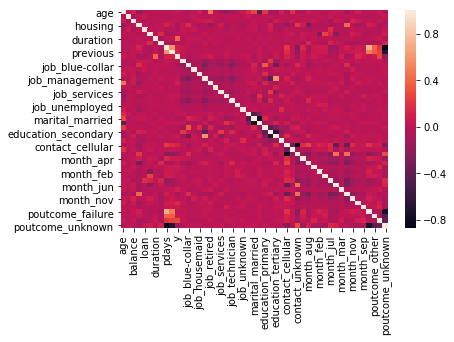

In [135]:
corr = df.corr()
sb.heatmap(corr)

In [136]:
df.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,-0.017885,0.083820,-0.193888,-0.011250,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,...,0.034671,0.057909,-0.119784,0.027659,0.081766,-0.015074,0.012693,-0.026179,0.048626,-0.017414
default,-0.017885,1.000000,-0.070886,0.006881,0.063994,-0.013261,-0.011615,-0.012348,-0.026317,-0.026656,...,-0.004950,-0.013687,0.005580,0.008962,-0.017550,-0.014105,-0.040055,0.005801,-0.022410,0.038997
balance,0.083820,-0.070886,1.000000,-0.050227,-0.071349,-0.008677,-0.015950,-0.009976,0.009437,0.026196,...,0.056023,0.021805,-0.070809,0.120363,0.058694,0.005975,0.025719,0.000129,0.029999,-0.033843
housing,-0.193888,0.006881,-0.050227,1.000000,0.018451,-0.031291,0.015740,-0.003574,0.116893,0.038621,...,-0.085332,-0.072133,0.412996,0.006073,-0.102506,-0.060410,0.094246,0.046986,-0.088504,-0.062805
loan,-0.011250,0.063994,-0.071349,0.018451,1.000000,-0.004879,-0.004997,0.017120,-0.031086,-0.022115,...,-0.036580,-0.038525,-0.032816,0.023113,-0.024372,-0.028523,-0.011652,-0.018397,-0.050643,0.041107
day,-0.017853,-0.013261,-0.008677,-0.031291,-0.004879,1.000000,-0.024629,0.160706,-0.094352,-0.059114,...,-0.217517,-0.024570,-0.028992,0.095832,0.040235,-0.043666,-0.064235,-0.021062,-0.027720,0.075100
duration,-0.002367,-0.011615,-0.015950,0.015740,-0.004997,-0.024629,1.000000,-0.068382,0.010380,0.018080,...,-0.016196,-0.026212,0.008639,0.009572,0.004566,-0.020023,-0.012852,0.008109,0.049255,-0.015239
campaign,-0.005148,-0.012348,-0.009976,-0.003574,0.017120,0.160706,-0.068382,1.000000,-0.093137,-0.067833,...,0.044317,-0.004045,-0.076263,-0.083385,-0.058536,-0.040207,-0.094021,-0.030435,-0.058268,0.117375
pdays,-0.008894,-0.026317,0.009437,0.116893,-0.031086,-0.094352,0.010380,-0.093137,1.000000,0.577562,...,-0.110324,0.008673,0.090216,0.012549,0.059521,0.047890,0.708380,0.382970,0.212188,-0.867713
previous,-0.003511,-0.026656,0.026196,0.038621,-0.022115,-0.059114,0.018080,-0.067833,0.577562,1.000000,...,-0.084432,0.019445,0.027549,0.055400,0.088764,0.059763,0.475289,0.358382,0.250277,-0.682746


In [137]:
# df['y']

In [138]:
# check skewness for target variable
#         """If skewness value lies above +1 or below -1, data is highly skewed. 
#         If it lies between +0.5 to -0.5, it is moderately skewed. 
#         If the value is 0, then the data is symmetric"""

# sb.distplot(df['y'])
# print ("Skewness of y is {}".format(df['y'].skew()))

# print("\n Mean: \n",df['y'].mean(), "\n\nSkew : \n",df['y'].skew(), "\n\nMedian: \n", df['y'].median())
#         df.hist()

In [139]:
# print("\nSkewness for y")
# df['y'] = np.sqrt(df['y'])
# print('Skewness is :', df['y'].skew())
# sb.distplot(df['y'])
# plt.show()
# # show() function remove next line--> "<matplotlib.axes._subplots.AxesSubplot at 0x7f9a114a0fd0>"


In [140]:
#remove skewness
def remove_skew(df):
    print("\nSkewness for y")
    df['y'] = np.cbrt(df['y'])
    print('Skewness is :', df['y'].skew())
    sb.distplot(df['y'])
    plt.show()
# remove_skew(df)

In [141]:
print (corr['y'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['y'].sort_values(ascending=False)[-10:]) #last 5 values`


y                     1.000000
duration              0.401118
poutcome_success      0.283481
month_oct             0.145964
contact_cellular      0.118761
previous              0.116714
pdays                 0.104087
month_mar             0.102716
job_retired           0.086675
month_sep             0.071510
month_dec             0.069884
month_apr             0.062563
education_tertiary    0.056649
poutcome_other        0.051908
job_student           0.047809
Name: y, dtype: float64 

----------------------
education_secondary   -0.028744
month_jul             -0.038851
campaign              -0.061147
marital_married       -0.064643
job_blue-collar       -0.068147
loan                  -0.070517
month_may             -0.102077
housing               -0.104683
contact_unknown       -0.139399
poutcome_unknown      -0.162038
Name: y, dtype: float64


In [142]:
#now transforming the target variable
def remove_skew():
    print("\nSkewness for y")
#         df['x2'] = (np.square(df['x2']))
    df['y'] = np.log(df['y'])
    print('Skewness is :', df['y'].skew())
    sb.distplot(df['y'])
    plt.show()
# target = np.log(df['y'])
# print ('Skewness is', target.skew())
# sb.distplot(target)
# remove_skew()

In [143]:
# check minimum values in each column
df.min()

age                      19
default                   0
balance               -3313
housing                   0
loan                      0
day                       1
duration                  4
campaign                  1
pdays                    -1
previous                  0
y                         0
job_admin.                0
job_blue-collar           0
job_entrepreneur          0
job_housemaid             0
job_management            0
job_retired               0
job_self-employed         0
job_services              0
job_student               0
job_technician            0
job_unemployed            0
job_unknown               0
marital_divorced          0
marital_married           0
marital_single            0
education_primary         0
education_secondary       0
education_tertiary        0
education_unknown         0
contact_cellular          0
contact_telephone         0
contact_unknown           0
month_apr                 0
month_aug                 0
month_dec           

In [144]:
#replace all zeroes with mean of that column
df.replace(0, df.mean(), inplace = True)

In [145]:
df.min()

age                      19.000000
default                   0.016810
balance               -3313.000000
housing                   0.566025
loan                      0.152842
day                       1.000000
duration                  4.000000
campaign                  1.000000
pdays                    -1.000000
previous                  0.542579
y                         0.115240
job_admin.                0.105729
job_blue-collar           0.209246
job_entrepreneur          0.037160
job_housemaid             0.024773
job_management            0.214333
job_retired               0.050874
job_self-employed         0.040478
job_services              0.092236
job_student               0.018580
job_technician            0.169874
job_unemployed            0.028312
job_unknown               0.008405
marital_divorced          0.116788
marital_married           0.618668
marital_single            0.264543
education_primary         0.149967
education_secondary       0.510064
education_tertiary  

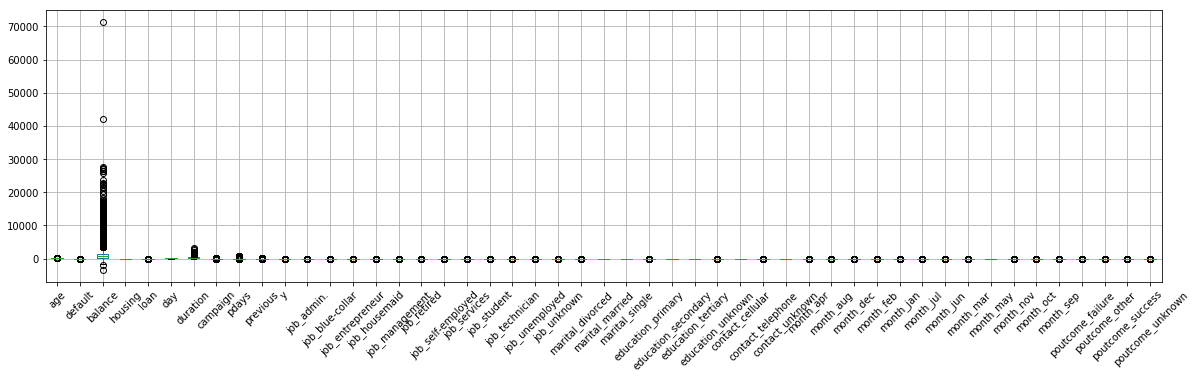

In [146]:
# check for ouliers
df.boxplot(rot=45, figsize=(20,5))
# sb.boxplot(data=df )
plt.show()

<Figure size 432x288 with 0 Axes>

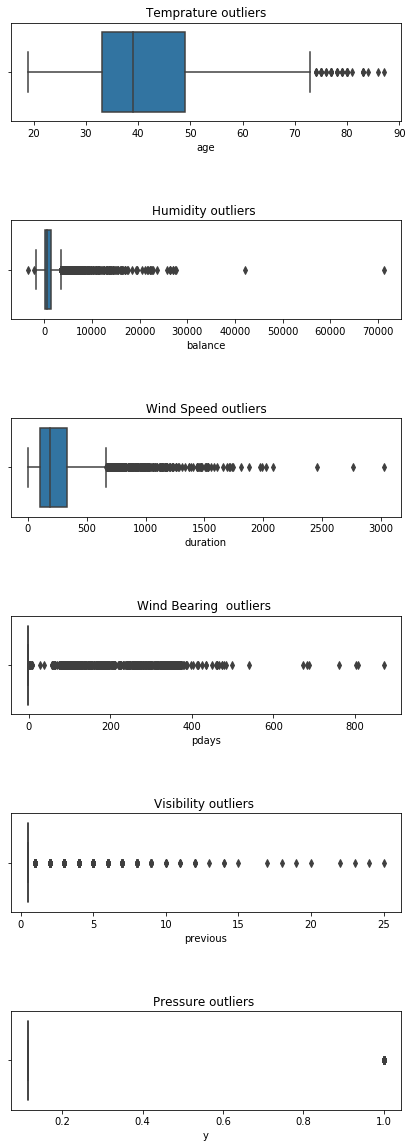

In [147]:
def check_outliers():
    # Create a figure instance, and the two subplots
    fig = plt.figure()
       # here we show 4 axes
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, ncols=1, figsize=(7, 20))

    sb.boxplot(df['age'], ax = ax1)
    ax1.set_title("Temprature outliers")
       
    sb.boxplot(df['balance'], ax = ax2)
    ax2.set_title("Humidity outliers ")
       
    sb.boxplot(df['duration'], ax = ax3)
    ax3.set_title(" Wind Speed outliers ")
       
    sb.boxplot(df['pdays'], ax = ax4)
    ax4.set_title("Wind Bearing  outliers ")
       
    sb.boxplot(df['previous'], ax = ax5)
    ax5.set_title("Visibility outliers ")
       
    sb.boxplot(df['y'], ax = ax6)
    ax6.set_title("Pressure outliers ")
       
    plt.subplots_adjust(hspace=1)
    plt.show()
    
check_outliers()

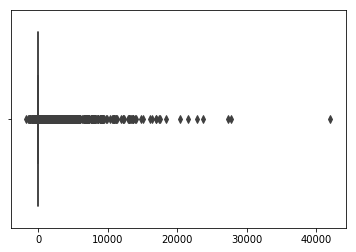

In [148]:
def remove_outlier(df):
       
        low = .2
        high = .75
        quant_df = df.quantile([low, high])
        for name in list(df.columns):
            if ptypes.is_numeric_dtype(df[name]):
                df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
                sb.boxplot(df)
remove_outlier(df)


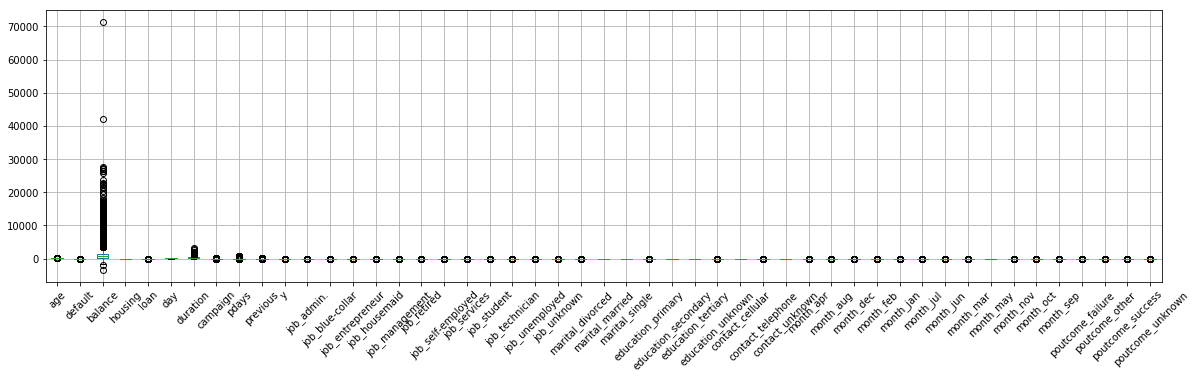

In [149]:
# check for ouliers
df.boxplot(rot=45, figsize=(20,5))
# sb.boxplot(data=df )
plt.show()

In [150]:
print('Head for df')
df.head()

Head for df


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0.01681,1787.000000,0.566025,0.152842,19,79,1,-1,0.542579,...,0.117452,0.010838,0.309224,0.086043,1.000000,0.011502,0.108383,0.043574,0.028534,1.000000
1,33,0.01681,4789.000000,1.000000,1.000000,11,220,1,339,4.000000,...,0.117452,0.010838,1.000000,0.086043,0.017695,0.011502,1.000000,0.043574,0.028534,0.819509
2,35,0.01681,1350.000000,1.000000,0.152842,16,185,1,330,1.000000,...,0.117452,0.010838,0.309224,0.086043,0.017695,0.011502,1.000000,0.043574,0.028534,0.819509
3,30,0.01681,1476.000000,1.000000,1.000000,3,199,4,-1,0.542579,...,1.000000,0.010838,0.309224,0.086043,0.017695,0.011502,0.108383,0.043574,0.028534,1.000000
4,59,0.01681,1422.657819,1.000000,0.152842,5,226,1,-1,0.542579,...,0.117452,0.010838,1.000000,0.086043,0.017695,0.011502,0.108383,0.043574,0.028534,1.000000


In [151]:
def Feature_Scaling(df):
        for column in df.columns:
            df[column] = ((df[column] - df[column].min()) /
                             (df[column].max() - df[column].min()))
        return df
df = Feature_Scaling(df)

In [152]:
# seperate data set
def features(df):
    y_new = df.y
#     y.head()
    df = df.drop('y', axis = 1)
    print("Seperate Exited column from dataset")
    return df, y_new
df, y_new = features(df)

Seperate Exited column from dataset


In [153]:
def split_data(df):
    # 70 % training datset
    train_per = int(0.70*len(df))
    print("Train dataset:", train_per)
    # 30% test dataset
    test_per = len(df)-train_per
    print("Test dataset:", test_per)
    
    print("\nConvert pandas datafrem into numpy")
    x_train_data = np.array(df[:train_per])   
    x_test_data  = np.array(df[:test_per])
    
    
    train_per_y = int(0.70*len(y_new))
    test_per_y = len(y_new)-train_per_y

    
    y_train_data = np.array(y_new[:train_per_y])
    y_test_data = np.array(y_new[:test_per_y])
    
    #reshpe (1357,) to (1357,1) for train and test dataset
    y_test_data = y_test_data.reshape(-1,1)
    y_train_data = y_train_data.reshape(-1,1)
        
    
    print("\nX train data shape:", x_train_data.shape)
    print("y train data shape:", y_train_data.shape)
    print("\nX test data shape:", x_test_data.shape)
    print("y test data shape:", y_test_data.shape)

    return x_train_data, y_train_data, x_test_data, y_test_data

x_train_data, y_train_data, x_test_data, y_test_data = split_data(df)        

Train dataset: 3164
Test dataset: 1357

Convert pandas datafrem into numpy

X train data shape: (3164, 48)
y train data shape: (3164, 1)

X test data shape: (1357, 48)
y test data shape: (1357, 1)


In [164]:
class NueralNetwork:
    def __init__(self):
        # assign learning rate
        self.learning_rate = 0.09800
        self.epoch = 1000
        
    def gradientDescent(self, x_train_data,y_train_data, w, b):
        m = len(x_train_data) 
        layers = (x_train_data.shape[1], 4, 5, 3, 1)
        
        z = [0] * len(layers)
        a = [0] * len(layers)
        dg = [0] * len(layers)
        dA = [0] * len(layers)
        dz = [0] * len(layers)
        db = [0] * len(layers)
        dw = [0] * len(layers)
        
        a[0] = x_train_data.T
        
        weight = []
        bias = []
        
        for i in range(1, len(layers)):
            weight.append(np.random.rand(layers[i], layers [i-1])*0.001)
            bias.append(np.zeros((layers[i], 1)) )   
            # without brackets it gives TypeError: data type not understood
            
        for j in range(self.epoch):
            for i in range(len(layers) - 1):
                
                #----------Forward Propagation ---------------
                
                #hypothesis function
                z[i] = np.dot(weight[i] , a[i]) + bias[i]
               
                # we are not taking a[i-1] bcoz it taking z (4, 49) shape
                # calculate activation function (sigmoid function)
                a[i+1] = 1 / (1 + np.exp(-z[i]))
               
                
            for i in reversed(range(len(layers) -1)):

                #-------Backword Propogation-------------

                #loss function derivation
                dA[i] = (-(y_train_data.T/ a[i+1]) + ((1 - y_train_data.T) / (1 - a[i+1])))
#                 print("dA[i] = ", dA[i].shape)
    
                #derivation of sigmoid function
                dg[i] = (1 / (1 + np.exp(-z[i]))) * (1 - (1 / (1 + np.exp(-z[i]))))
#                 print("dg[i] = ", dg[i].shape)
                
                dz[i] = dA[i] * dg[i]
#                 print("dz[i] = ", dz[i].shape)

                dw[i] =  np.dot(dz[i], a[i].T) / m
#                 print("dw[i] = ", dw[i].shape)

                db[i] = np.sum(dz[i], axis =1 ,keepdims = True) / m
                
                # update weight and bias
                weight[i] = weight[i] - np.dot(self.learning_rate, dw[i])
                bias[i] = bias[i] - np.dot(self.learning_rate, db[i])
                
        print("shape of Z", z[i].shape)
        print("shape of a[i+1]", a[i+1].shape)
        print("shape of dg[i]", dg[i].shape)
        print("shape of da[i]", dA[i].shape)
        print("shape of dz[i]", dz[i].shape)
        print("shape of dw[i]", dw[i].shape)
        print("shape of db[i]", db[i].shape)
        print("shape of weight[i]", weight[i].shape)
        print("shape of baised[i]", bias[i].shape)
        
        return [weight, bias] 
    
    
    
    def predict(self, x_test_data, parameters):
            i = 0
            z = [0] * 5
            a = [0] * 5
            a[0] = x_test_data.T
            for i in range(4):
                z[i] = np.dot(parameters[0][i], a[i]) + parameters[1][i]
                a[i+1] = 1 / (1 + np.exp(-z[i])) 
                #predict y value
            return a[-1]

    def accuracy(self, y_test_data, y_pred_test):
        y_pred_test = np.nan_to_num(y_pred_test)
   
        test_accuracy = 100 - (np.mean(np.abs(y_pred_test - y_test_data)) * 100)        
        return test_accuracy
    
          
def main(x_train_data, y_train_data, x_test_data, y_test_data):
    # class object created
    obj = NueralNetwork()
    
    print("/nx_train_data shape",x_train_data.shape)
    print("x_test_data shape",x_train_data.shape)
    
    # intialization
    x_col = 48
    
    # create vector for theta's(weights)
    w = np.full((x_col + 1, 1),0.5)
    b = np.zeros((1, 1), dtype = 'float')
    
    x_train_data = np.column_stack((np.ones((x_train_data.shape[0], 1)), x_train_data))
    x_test_data = np.column_stack((np.ones((x_test_data.shape[0], 1)), x_test_data))
    print("\n\nx_train_data shape",x_train_data.shape)
    print("x_test_data shape",x_train_data.shape)
    
    parameters = obj.gradientDescent(x_train_data, y_train_data, w, b)

    y_predict_test = obj.predict(x_test_data, parameters)
#     print("y_predict test:",y_predict_test.shape)
    
    y_predict_train = obj.predict(x_train_data, parameters)
#     print("y_predict train:",y_predict_train.shape)
    
    train_accuracy=obj.accuracy(y_train_data, y_predict_train)
    test_accuracy=obj.accuracy(y_test_data, y_predict_test)

    print("Accuracy train:", train_accuracy)
    print("Accuracy test:",  test_accuracy)
    
#     alpha --> self.l_rate = 0.001
#     Accuracy train: 75.49879331841993
#     Accuracy test: 75.30290492969557
    
if __name__ == '__main__':
    main(x_train_data, y_train_data, x_test_data, y_test_data)

/nx_train_data shape (3164, 48)
x_test_data shape (3164, 48)


x_train_data shape (3164, 49)
x_test_data shape (3164, 49)
shape of Z (4, 3164)
shape of a[i+1] (4, 3164)
shape of dg[i] (4, 3164)
shape of da[i] (4, 3164)
shape of dz[i] (4, 3164)
shape of dw[i] (4, 49)
shape of db[i] (4, 1)
shape of weight[i] (4, 49)
shape of baised[i] (4, 1)
Accuracy train: 79.54929130825754
Accuracy test: 79.31944673638611


In [ ]:
# alpha = 0.0001

# Accuracy train: 51.223403048474005
# Accuracy test: 51.21395614615359
    
# alpha = 0.001    
# Accuracy train: 58.81136212550142
# Accuracy test: 58.74346137200593
    
# alpha = 0.0070  
# Accuracy train: 73.35175547678608
# Accuracy test: 73.17242555145376
    
# alpha = 0.0080 
# Accuracy train: 74.20971477633549
# Accuracy test: 74.0237750537206
    
# alpha = 0.080 
# Accuracy train: 79.54060025016788
# Accuracy test: 79.3116858320872

In [165]:
############### Following code just for cheking shapes of each step

In [166]:
############### Following code just for cheking shapes of each step
class NueralNetwork:
    def __init__(self):
        # assign learning rate
        self.learning_rate = 0.0070
        self.epoch = 60000
        
    def gradientDescent(self, x_train_data,y_train_data, w, b):
        m = len(x_train_data) 
        layers = (x_train_data.shape[1], 4, 5,  3, 1)
        
        z = [0] * len(layers)
        a = [0] * len(layers)
        dg = [0] * len(layers)
        dA = [0] * len(layers)
        dz = [0] * len(layers)
        db = [0] * len(layers)
        dw = [0] * len(layers)
        
#         A = [0] * len(layers)
        a[0] = x_train_data.T
        
        weight = []
        bais = []
        
        for i in range(1, len(layers)):
            weight.append(np.random.rand(layers[i], layers [i-1])*0.001)
            bais.append(np.zeros(((layers[i], 1))) )
       
        for j in range(self.epoch):
            for i in range(0, len(layers) - 1):
                print("\n\nLayer : ", i)
                #----------Forward Propagation ---------------
                print("weight ", i, "= ", weight[i].shape)

                #hypothesis function
                z[i] = np.dot (weight[i] , a[i]) + bais[i]
                #  z[i] = np.dot (weight[i] , A[i - 1]) + bais[i] 
                # we are not taking a[i - 1] bcoz it taking z (4, 49) shape
#                 print("z[i] = weight",weight[i].shape, "A[i] = ",A[i].shape, "bais[i] = ", bais[i].shape )
                print("z (hypo)",i, "= ",z[i].shape)
                
                # calculate activation function (sigmoid function)
                a[i+1] = 1 / (1 + np.exp(-z[i]))
                print("a",i, "= ",a[i+1].shape)
                # A[i] = g[i] * (z[i])  --> Activation function * hepo
#                 A[i] = a[i] * z[i]
                
                #-------Backword Propogation-------------
                
                #loss function derivation
#                 da[i] = (-(y_train_data.T / a[i+1]) + ((1 - y_train_data.T) / (1 - a[i+1])))
#                 print("dA[i] = ",y_train_data.shape, a[i].shape)
                dA[i] = (-(y_train_data.T/ a[i+1]) + ((1 - y_train_data.T) / (1 - a[i+1])))

                print("dA[i] = ", dA[i].shape)
    
                #derivation of sigmoid function
                dg[i] = a[i+1] * 1 - a[i+1] 
                print("dg[i] = ", dg[i].shape)
                
                dz[i] = dA[i] * dg[i]
                print("dz[i] = ", dz[i].shape)

                dw[i] =  np.dot(dz[i], a[i].T) / m
                print("dw[i] = ", dw[i].shape)


                # ---------------------error here put dp[i] tp solve it----------------------------------
                db = np.sum(dz[i], axis = 1 ,keepdims = True) / m
#                 print("db[i] = ", db[i].shape)
                
                # update weight and bias
                # w = w - alpha * dw
                # b = b - alpha * db

                weight[i] = weight[i] - np.dot(self.learning_rate, dw[i])
                bais[i] = bais[i] - np.dot(self.learning_rate, db[i])
            
        print(" z shape :", z.shape)
        print("sigmoid :", a.shape)
        print("dz :", dz.shape)
        print("dw :",dw.shape)
        print("db :", db.shape)
        print("weight :", weight.shape)
        print("Bias :", bias.shape)  
        return [weight, bais] 
    
    
    def predict(self, x_test_data, parameters):
            #reshape
            a = [0] * 6
            a[0] = x_test_data.T
            z = [0] * 6
#             a = [0] * 6
            for i in range(4):  
                z[i] = np.dot(parameters[0][i], a[i]) + parameters[1][i]
                a[i+1] = 1 / (1 + np.exp(-z[i])) 
            return a[-1]
            return y_predict
    
    
    def accuracy(self, y_test_data, y_pred_test):
        y_pred_test = np.nan_to_num(y_pred_test)
   
        test_accuracy = 100 - (np.mean(np.abs(y_pred_test - y_test_data)) * 100)        
        return test_accuracy
        
def main(x_train_data, y_train_data, x_test_data, y_test_data):
    # class object created
    obj = NueralNetwork()
    
    print("/nx_train_data shape",x_train_data.shape)
    print("x_test_data shape",x_train_data.shape)
    
    # intialization
    x_col = 48
    
    # create vector for theta's(weights)
    w = np.full((x_col + 1, 1),0.5)
    b = np.zeros((1, 1), dtype = 'float')
    
    x_train_data = np.column_stack((np.ones((x_train_data.shape[0], 1)), x_train_data))
    x_test_data = np.column_stack((np.ones((x_test_data.shape[0], 1)), x_test_data))
    print("\n\nx_train_data shape",x_train_data.shape)
    print("x_test_data shape",x_train_data.shape)
    
    parameters = obj.gradientDescent(x_train_data, y_train_data, w, b)

    y_predict_test = obj.predict(x_test_data, parameters)
    print("y_predict test:",y_predict_test.shape)
    
    y_predict_train = obj.predict(x_train_data, parameters)
    print("y_predict train:",y_predict_train.shape)
    
    train_accuracy=obj.accuracy(y_train_data, y_predict_train)
    test_accuracy=obj.accuracy(y_test_data, y_predict_test)

    print("Accuracy train:", train_accuracy)
    print("Accuracy test:",  test_accuracy)
    
    
if __name__ == '__main__':
    main(x_train_data, y_train_data, x_test_data, y_test_data)

/nx_train_data shape (3164, 48)
x_test_data shape (3164, 48)


x_train_data shape (3164, 49)
x_test_data shape (3164, 49)


Layer :  0
weight  0 =  (4, 49)
z (hypo) 0 =  (4, 3164)
a 0 =  (4, 3164)
dA[i] =  (4, 3164)
dg[i] =  (4, 3164)
dz[i] =  (4, 3164)
dw[i] =  (4, 49)


Layer :  1
weight  1 =  (5, 4)
z (hypo) 1 =  (5, 3164)
a 1 =  (5, 3164)
dA[i] =  (5, 3164)
dg[i] =  (5, 3164)
dz[i] =  (5, 3164)
dw[i] =  (5, 4)


Layer :  2
weight  2 =  (3, 5)
z (hypo) 2 =  (3, 3164)
a 2 =  (3, 3164)
dA[i] =  (3, 3164)
dg[i] =  (3, 3164)
dz[i] =  (3, 3164)
dw[i] =  (3, 5)


Layer :  3
weight  3 =  (1, 3)
z (hypo) 3 =  (1, 3164)
a 3 =  (1, 3164)
dA[i] =  (1, 3164)
dg[i] =  (1, 3164)
dz[i] =  (1, 3164)
dw[i] =  (1, 3)


IndexError: index 3 is out of bounds for axis 0 with size 1